In [155]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, Dense, Flatten
import cv2
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score
import seaborn as sns

In [94]:
y_vals = {'Brad Pitt' : 0, 'Hugh Jackman' : 1, 'Johnny Depp' : 2, 'Leonardo DiCaprio' : 3, 'Robert Downey Jr' : 4, 'Tom Cruise' : 5, 'Tom Hanks' : 6, 'Will Smith' : 7}

In [95]:
# dir_to_find = 'Celebrity_Faces_Dataset'

# labels = os.listdir(f'./Face_recognition/{dir_to_find}/')
# print(labels)
# x = []
# y = []

# for i in labels:
#     print(i)
#     for j in os.listdir(f'./Face_recognition/{dir_to_find}/{i}'):
#         img = cv2.imread(f'./Face_recognition/{dir_to_find}/{i}/{j}', cv2.IMREAD_GRAYSCALE)
#         if img.shape[0] >= 300 and img.shape[1] >= 300:
#             img = cv2.resize(img, (200, 200), interpolation=cv2.INTER_LINEAR)
#             x.append(img)
#             y.append(y_vals[i])


# x = np.array(x)
# y = np.array(y)

In [96]:
def show_img(x, y):
    plt.gray()
    plt.title(str(y))
    plt.imshow(x)

In [97]:
# np.save('./face_reg.npy' , x)
# np.save('./face_reg_labels.npy' , y)

In [98]:
X_train = np.load('./face_reg.npy')
y_train = np.load('./face_reg_labels.npy')

In [99]:
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(1000)

In [100]:
def splits(dataset, TRAIN_RATIO = 0.8, VAL_RATIO = 0.15, TEST_RATIO = 0.05):
    DATASET_SIZE = len(dataset)

    train_dataset = dataset.take(int(TRAIN_RATIO*DATASET_SIZE)).map(lambda x, y: 
        (
            tf.reshape(x , (200 , 200 , 1)) 
            , y
        )
    ).batch(32)

    val_test_dataset = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))

    val_dataset = val_test_dataset.take(int(VAL_RATIO*DATASET_SIZE)).map(lambda x, y: 
        (
            tf.reshape(x , (200 , 200 , 1)) 
            , y
        )
    ).batch(32)

    test_dataset = val_test_dataset.skip(int(VAL_RATIO*DATASET_SIZE)).map(lambda x, y: 
        (
            tf.reshape(x , (200 , 200 , 1)) 
            , y
        )
    )
    return train_dataset, val_dataset, test_dataset

In [101]:
train_ds , val_ds , test_ds = splits(dataset)

In [102]:
model = Sequential([
    Conv2D(filters = 16, kernel_size = (3 , 3), strides = 1, padding = 'same', activation = 'relu', input_shape = (200, 200, 1)),
    MaxPool2D(pool_size = (2 , 2), strides = 2),
    
    Conv2D(filters = 32, kernel_size = (3 , 3), strides = 1, padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2 , 2), strides = 2),

    Conv2D(filters = 64, kernel_size = (3 , 3), strides = 1, padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2 , 2), strides = 2),
    
    Flatten(),
    Dense(8, activation = 'softmax')
])

d:\College\pccoe\5th sem\CV\Practicals\Final_practicals\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [103]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [104]:
history = model.fit(train_ds, validation_data = val_ds, epochs=20)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.1370 - loss: 151.7180 - val_accuracy: 0.1947 - val_loss: 2.3669
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.2088 - loss: 2.1663 - val_accuracy: 0.4071 - val_loss: 1.7191
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.4749 - loss: 1.5828 - val_accuracy: 0.5398 - val_loss: 1.2729
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.6507 - loss: 1.0528 - val_accuracy: 0.7788 - val_loss: 0.7447
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.8384 - loss: 0.5898 - val_accuracy: 0.8938 - val_loss: 0.3407
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9093 - loss: 0.3193 - val_accuracy: 0.9735 - val_loss: 0.1307
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9789 - loss: 0.1266 - val_accuracy: 1.0000 - val_loss: 0.0547
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 1.0000 - loss: 0.0552 - val_accuracy: 

class = 4 conf= 0.9999974


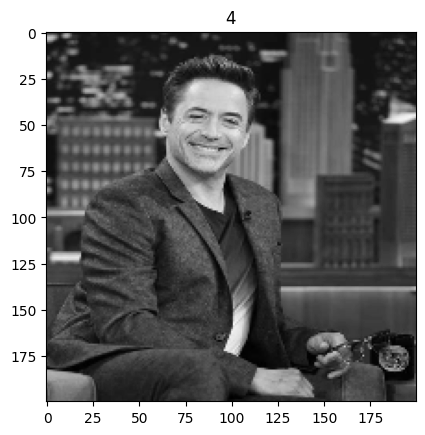

In [124]:
for x, y in test_ds.shuffle(1000).as_numpy_iterator():
    show_img(x , y)
    x = x.reshape(1, 200, 200, 1)
    predictions = model.predict(x, verbose=0)
    # Get predicted class and confidence
    predicted_class = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class]
    print('class =', predicted_class, 'conf=' , confidence)
    break

In [106]:
model.save('face_reg.keras')

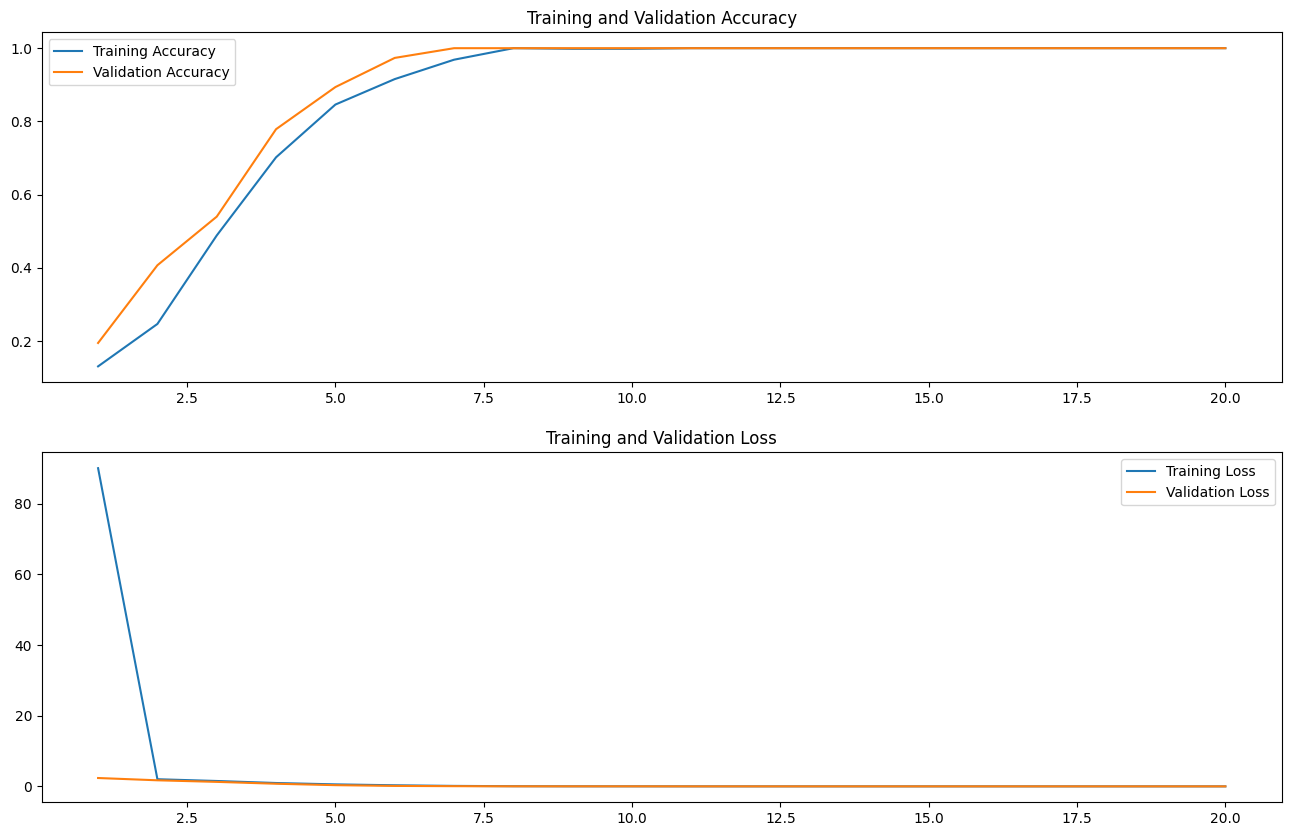

In [107]:
plt.figure(figsize=(16,10))
plt.subplot(2,1,1)
plt.plot(range(1, 20+1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, 20+1), history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(["Training Accuracy","Validation Accuracy"])
plt.subplot(2,1,2)
plt.plot(range(1, 20+1), history.history['loss'], label='Training Loss')
plt.plot(range(1, 20+1), history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(["Training Loss","Validation Loss"])
plt.show()

In [149]:
y_true = []
y_pred = []

for x, y in test_ds.as_numpy_iterator():  # Iterate through the test dataset
    y_true.append(y.item())   # Collect true labels
    x = x.reshape(1, 200, 200, 1)
    predictions = model.predict(x)  # Predict on the batch
    y_pred.append(np.argmax(predictions, axis=1)[0].item())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

In [152]:
y_true = np.array(y_true)
y_pred = np.array(y_pred) 

Confusion Matrix:
[[ 5  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0]
 [ 0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0  1]]
F1 Score: 1.0
Recall: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         1

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



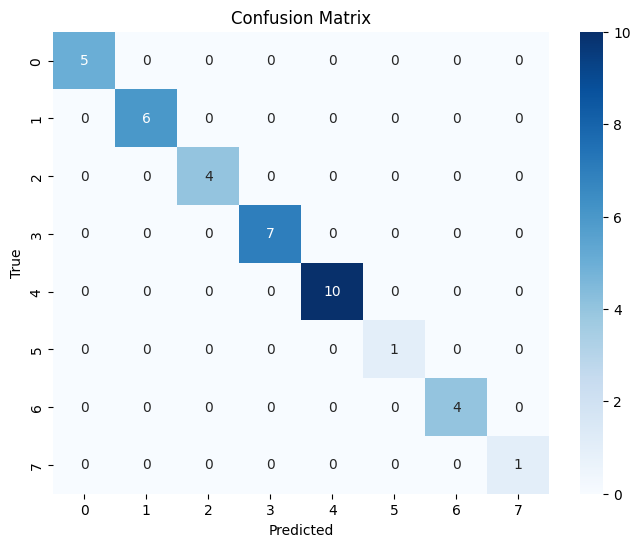

In [156]:
conf_matrix = confusion_matrix(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')  # Weighted F1-score
recall = recall_score(y_true, y_pred, average='weighted')  # Weighted Recall

# Print metrics
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# Step 3: Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()